### Lecture 1

#### Environment Setup

In [1]:
!python -V

Python 3.6.12 :: Anaconda, Inc.


In [2]:
!python3 -V

Python 3.6.12 :: Anaconda, Inc.


In [3]:
import torch
import torchvision


print(torch.__version__)
print(torchvision.__version__)
print(torch.cuda.is_available())

1.7.0
0.8.1
False


#### Bonus Tip


##### Jupyter Notebook Remote Server

##### Terminal Only
`
$ jupyter notebook --port 8888 --no-browser --ip 0.0.0.0
`

#### Windows Troubleshooting

Reference: <a href="https://pytorch.org/docs/stable/notes/windows.html" target="_BLANK">WINDOWS FAQ</a>

#### LeNet-5 Architecture

In [29]:
import torch


class LeNet5(torch.nn.Module):
    
    def __init__(self):
        
        super(LeNet5, self).__init__()
        
        self.convnet = torch.nn.Sequential(
            # Conv Block 1
            torch.nn.Conv2d(
                in_channels=1,
                out_channels=6,
                kernel_size=(5, 5),
                stride=1,
                bias=True
            ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=1
            ),
            # Conv Block 2
            torch.nn.Conv2d(
                in_channels=6,
                out_channels=16,
                kernel_size=(5, 5),
                stride=1,
                bias=True
            ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=1
            ),
            # Conv Block 3
            torch.nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=(5, 5),
                stride=1,
                bias=True
            ),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(
                kernel_size=(2, 2),
                stride=1
            )
        )
        
        self.fcn = torch.nn.Sequential(
            # Fully Connected Layer 1
            torch.nn.Linear(
                in_features=9248,
                out_features=84,
                bias=True
            ),
            torch.nn.ReLU(),
            # Classifier Layer 2
            torch.nn.Linear(
                in_features=84,
                out_features=10,
                bias=True
            ),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, batch):
        ret = self.convnet(batch)
        ret = ret.view(batch.size(0), -1)
        ret = self.fcn(ret)
        return ret

#### Visualize Network ( Bonus )

In [30]:
! python3 -m pip install graphviz hiddenlayer --user

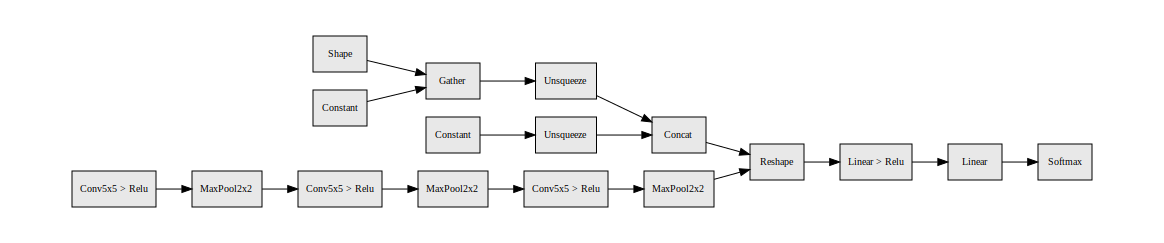

In [31]:
import hiddenlayer

hiddenlayer.build_graph(LeNet5(), torch.zeros(1, 1, 32, 32))

<i>Reference</i>: <a href="https://github.com/waleedka/hiddenlayer">HiddenLayer Documentation</a>

### Lecture 2

In [8]:
import numpy as np
import torch.nn.functional as F

In [10]:
inputs = torch.from_numpy(
            np.array(
                [
                    [0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]
                ],
                dtype=np.float32
            )
        )

outputs = torch.from_numpy(
            np.array(
                [
                    0,
                    1,
                    1,
                    0
                ],
                dtype=np.float32
            )
        )

# One neuron with two inputs
weights = torch.randn(1, 2)
# Apply gradiant mechanism to this tensor
weights.requires_grad = True

# Another tensor
bias = torch.randn(1, requires_grad=True)

In [11]:
# Applies a dot product between the inputs and the weights and the bias
F.linear(inputs, weights, bias)

tensor([[0.4040],
        [2.0728],
        [0.5833],
        [2.2520]], grad_fn=<AddmmBackward>)

In [13]:
# output 
preds = F.linear(inputs, weights, bias)

# loss function
loss = (outputs - preds).mean()

In [14]:
# 
preds.grad_fn

In [15]:
loss.grad_fn

In [16]:
weights.grad

In [17]:
# Start the back propagation
loss.backward()

In [18]:
weights.grad

tensor([[-0.5000, -0.5000]])

### Lecture 3

#### MNIST Dataset

In [19]:
import torchvision

In [20]:
# Padding to change the size
# ToTensor to normalize between 0 and 1

data_train = torchvision.datasets.MNIST(
    './data/mnist',
    train=True,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Pad(2),
        torchvision.transforms.ToTensor()
    ])
)

data_test = torchvision.datasets.MNIST(
    './data/mnist',
    train=False,
    download=True,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.Pad(2),
        torchvision.transforms.ToTensor()
    ])
)

Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw


Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw
Processing...


/home/stephany/miniconda3/envs/pytorch_env/lib/python3.6/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729004493/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [21]:
BATCH_SIZE = 32

# Efficient loading of the images
train_loader = torch.utils.data.DataLoader(
    data_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=4 #depends on your cpu/gpu
)

test_loader = torch.utils.data.DataLoader(
    data_test,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=4
)

#### GPU Support

In [22]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')


device

device(type='cpu')

#### Cauchy-Schwarz Divergence

In [23]:
# convert the vector of outputs to onehot encoded output (matrix)
def encodeOneHot(torch_tensor):
    a = torch_tensor.cpu().numpy()
    
    b = np.zeros( ( a.size, 10 ) )
    
    b[ np.arange(a.size), a ] = 1

    return torch.from_numpy(b).float().to(device)

# Cauchy–Schwartz divergence (CSD)
class CSD(torch.nn.Module):
    
    def __init__(self):
        
        super(CSD, self).__init__()
    
    def forward(self, outputs, target):
        
        y = encodeOneHot(target)
        
        # dot product between the outouts and the target label y
        nom = torch.sum(torch.mm(outputs, y.t()), dim=1)
        
        denom = torch.norm(outputs, 2) * torch.norm(y, 2)
        
        #return scalar value
        return torch.mean(-1 * torch.log(nom / denom))

#### Model Training

In [32]:
network = LeNet5().to(device)
optimizer = torch.optim.Adam(network.parameters(), lr=0.005)
criterion = CSD() #loss function

In [33]:
epochs = 128
steps = len(train_loader) // BATCH_SIZE

network.train(True)

for e in range(epochs):
    
    epoch_loss = 0

    performed_steps = 0
    
    for i, (images, labels) in enumerate(train_loader):
        
        if i == steps:
            break
        
        # translate it to our device
        images, labels = images.to(device), labels.to(device)
        #initialize gradients (not accumulating from previous epochs)
        optimizer.zero_grad()
        
        outputs = network(images)
        
        loss = criterion(outputs, labels)
        
        #calculating the gradients
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss
        
        performed_steps += 1
    
    assert performed_steps == steps, "steps: {} != {}".format(steps, performed_steps)
    
    print("Epoch: {}, Loss: {:0.4f}".format(
        e + 1,
        epoch_loss / steps
    ))


Epoch: 1, Loss: 1.1622
Epoch: 2, Loss: 1.1510
Epoch: 3, Loss: 1.1520
Epoch: 4, Loss: 1.1501
Epoch: 5, Loss: 1.1510
Epoch: 6, Loss: 1.1520
Epoch: 7, Loss: 1.1467
Epoch: 8, Loss: 1.1508
Epoch: 9, Loss: 1.1516
Epoch: 10, Loss: 1.1515
Epoch: 11, Loss: 1.1488
Epoch: 12, Loss: 1.1481
Epoch: 13, Loss: 1.1479
Epoch: 14, Loss: 1.1512
Epoch: 15, Loss: 1.1511
Epoch: 16, Loss: 1.1505
Epoch: 17, Loss: 1.1526
Epoch: 18, Loss: 1.1488
Epoch: 19, Loss: 1.1496
Epoch: 20, Loss: 1.1521
Epoch: 21, Loss: 1.1510
Epoch: 22, Loss: 1.1494
Epoch: 23, Loss: 1.1507
Epoch: 24, Loss: 1.1493
Epoch: 25, Loss: 1.1519
Epoch: 26, Loss: 1.1510
Epoch: 27, Loss: 1.1518
Epoch: 28, Loss: 1.1512
Epoch: 29, Loss: 1.1496
Epoch: 30, Loss: 1.1515
Epoch: 31, Loss: 1.1503
Epoch: 32, Loss: 1.1513
Epoch: 33, Loss: 1.1495
Epoch: 34, Loss: 1.1466
Epoch: 35, Loss: 1.1516
Epoch: 36, Loss: 1.1510
Epoch: 37, Loss: 1.1490
Epoch: 38, Loss: 1.1520
Epoch: 39, Loss: 1.1505
Epoch: 40, Loss: 1.1499
Epoch: 41, Loss: 1.1502
Epoch: 42, Loss: 1.1509
E

#### Model Evaluation

In [35]:
avg_loss = 0
avg_acc = 0

network.train(False)

#not gradients would be calulated or updated
with torch.no_grad():
    
    steps = 0

    for images, labels in test_loader:
        
        images, labels = images.to(device), labels.to(device)

        outputs = network(images)

        avg_loss += criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        avg_acc += preds.eq(labels).sum().item()
        
        steps += 1


print("Loss: {:0.2f}, Acc: {:.2%}".format(
    avg_loss / steps,
    avg_acc / (steps * BATCH_SIZE)
))

Loss: 1.15, Acc: 11.33%


### Read More

<ul>
    <li>Robert Jenssen, Jose C. Principe, Deniz Erdogmus, Torbjørn Eltoft, The Cauchy–Schwarz divergence and Parzen windowing: Connections to graph theory and Mercer kernels, Journal of the Franklin Institute, Volume 343, Issue 6, 2006, Pages 614-629, ISSN 0016-0032, https://doi.org/10.1016/j.jfranklin.2006.03.018.</li>
    <li>Jenssen, R., Eltoft, T., Erdogmus, D. et al. J VLSI Sign Process Syst Sign Image Video Technol (2006) 45: 49. https://doi.org/10.1007/s11265-006-9771-8</li>
    <li>Janocha, K., & Czarnecki, W. (2017). On Loss Functions for Deep Neural Networks in Classification. CoRR, abs/1702.05659.</li>
    <li>Lecun, Yann & Bottou, Leon & Bengio, Y & Haffner, Patrick. (1998). Gradient-Based Learning Applied to Document Recognition. Proceedings of the IEEE. 86. 2278 - 2324. 10.1109/5.726791. http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf </li>
</ul>

#### Course Discussions

Slack Channel: <a href="https://mqubits.slack.com/join/shared_invite/enQtNjU2MTQ3ODgxMjY3LTgyMGM3MzFjOTQ3OTdlYjVmMGJkZWI0NzgxNDAyNzEzYWVlNjQwOGQ5ZmY0MzFiYjc5OGNkZmY3YzQ5M2RhOWM">https://mqubits.slack.com/join/shared_invite/enQtNjU2MTQ3ODgxMjY3LTgyMGM3MzFjOTQ3OTdlYjVmMGJkZWI0NzgxNDAyNzEzYWVlNjQwOGQ5ZmY0MzFiYjc5OGNkZmY3YzQ5M2RhOWM</a>

#### Google Colab

<a href="https://colab.research.google.com/drive/1BON2RGHeRqS1tM3raz6HSpO8Xfz5-vYy">https://colab.research.google.com/drive/1BON2RGHeRqS1tM3raz6HSpO8Xfz5-vYy</a>